In [308]:
#Librerias
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

## Conocimiento del dataset
En este paso he leido el archivo csv y ejecutamos una función para estraer todas las columnas y el tipo de dato que contienen.

In [309]:
#Lectura del csv
df = dd.read_csv('air_traffic_data (1).csv') 
df.compute()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [310]:
#Muestro las columnas y el tipo de dato que tienen
df.dtypes

Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
Adjusted Activity Type Code    object
Adjusted Passenger Count        int64
Year                            int64
Month                          object
dtype: object

## ¿Cuántas compañias diferentes hay en el Dataset?
Primero creamos una lista con las diferentes compañias que hay y luego he hecho un recuento.

In [311]:
#Muestro cuantas compañias diferentes hay en el dataset
compañias_totales= list(df['Operating Airline'].unique().compute())
print(compañias_totales)
print("Hay en total" , len(compañias_totales), "compañias diferentes")

['ATA Airlines', 'Air Canada ', 'Air China', 'Air France', 'Air New Zealand', 'AirTran Airways', 'Alaska Airlines', 'All Nippon Airways', 'American Airlines', 'American Eagle Airlines', 'Asiana Airlines', 'Atlantic Southeast Airlines', 'BelAir Airlines', 'British Airways', 'Cathay Pacific', 'China Airlines', 'Delta Air Lines', 'EVA Airways', 'Frontier Airlines', 'Hawaiian Airlines', 'Horizon Air ', 'Icelandair', 'Independence Air', 'Japan Airlines', 'KLM Royal Dutch Airlines', 'Korean Air Lines', 'Lufthansa German Airlines', 'Mesa Airlines', 'Mexicana Airlines', 'Midwest Airlines', 'Northwest Airlines', 'Philippine Airlines', 'Singapore Airlines', 'SkyWest Airlines', 'Sun Country Airlines', 'TACA', 'US Airways', 'United Airlines', 'United Airlines - Pre 07/01/2013', 'Virgin Atlantic', 'WestJet Airlines', 'Boeing Company', 'Miami Air International', 'Air Canada Jazz', 'Qantas Airways', 'Ameriflight', 'Spirit Airlines', 'Xtra Airways', 'Evergreen International Airlines', 'Aeromexico', 'J

## Media de Pasajeros por compañia.
Através de la columna "Operating Airnline" y "Passenger Count" obtenemos la media total de pasajeros por compañia. He recopilado todas las medias en una lista. Luego creo un diccionario que cada media acompaña a su aerolinea, para guardarlo en un nuevo DataFrame que luego será guardado en un archivo csv, en un paso más adelante.

In [312]:
#Media de pasajeros por compañia
media_pasajeros = list(df.groupby('Operating Airline')['Passenger Count'].mean().compute())
print(media_pasajeros)

[8744.636363636364, 4407.183673469388, 5463.822222222222, 2320.75, 18251.560109289618, 294.2142857142857, 6618.335907335907, 11589.077519379845, 2834.5, 7452.339768339768, 10569.238938053097, 17251.637816245006, 6385.523255813953, 1516.8125, 127164.38970588235, 4006.5283018867926, 5.0, 5902.961240310077, 2176.909090909091, 34.0, 415.3636363636364, 18.0, 17625.124031007752, 3418.0714285714284, 17121.325581395347, 9857.51550387597, 5498.402777777777, 4321.4375, 23358.55681818182, 68498.49740932643, 13116.356589147286, 9070.866666666667, 6476.088235294118, 2.0, 5631.84375, 17787.676923076924, 8282.186046511628, 5577.583333333333, 2799.7, 6391.3, 6470.332046332046, 4280.3125, 35261.13963963964, 9221.813953488372, 5678.461240310077, 2786.011111111111, 19301.96511627907, 3710.5811965811968, 2864.7272727272725, 7993.806451612903, 107.375, 3883.0, 26109.25, 160.0, 10248.635658914729, 4991.2164179104475, 2452.5, 5865.847222222223, 90.05555555555556, 14746.647286821706, 37083.83904465213, 81188.

In [313]:
dictionary = dict(zip(compañias_totales, media_pasajeros))
print(dictionary)

{'ATA Airlines': 8744.636363636364, 'Air Canada ': 4407.183673469388, 'Air China': 5463.822222222222, 'Air France': 2320.75, 'Air New Zealand': 18251.560109289618, 'AirTran Airways': 294.2142857142857, 'Alaska Airlines': 6618.335907335907, 'All Nippon Airways': 11589.077519379845, 'American Airlines': 2834.5, 'American Eagle Airlines': 7452.339768339768, 'Asiana Airlines': 10569.238938053097, 'Atlantic Southeast Airlines': 17251.637816245006, 'BelAir Airlines': 6385.523255813953, 'British Airways': 1516.8125, 'Cathay Pacific': 127164.38970588235, 'China Airlines': 4006.5283018867926, 'Delta Air Lines': 5.0, 'EVA Airways': 5902.961240310077, 'Frontier Airlines': 2176.909090909091, 'Hawaiian Airlines': 34.0, 'Horizon Air ': 415.3636363636364, 'Icelandair': 18.0, 'Independence Air': 17625.124031007752, 'Japan Airlines': 3418.0714285714284, 'KLM Royal Dutch Airlines': 17121.325581395347, 'Korean Air Lines': 9857.51550387597, 'Lufthansa German Airlines': 5498.402777777777, 'Mesa Airlines': 

In [314]:
df1 = pd.DataFrame(dictionary,index=[0])
df2 = dd.from_pandas(df1,1)
df2.compute()


,ATA Airlines,Air Canada,Air China,Air France,Air New Zealand,AirTran Airways,Alaska Airlines,All Nippon Airways,American Airlines,American Eagle Airlines,...,XL Airways France,China Eastern,SAS Airlines,"Atlas Air, Inc",Compass Airlines,Etihad Airways,China Southern,Turkish Airlines,"COPA Airlines, Inc.",Air India Limited
0,8744.636364,4407.183673,5463.822222,2320.75,18251.560109,294.214286,6618.335907,11589.077519,2834.5,7452.339768,...,8162.416667,55317.815789,72732.058296,48915.467502,74405.353591,9847.104651,5338.15534,261.666667,2223.16129,73.0


## Gráfico de barras.
He creado un gráfico de barras para la presentación de la media de pasajeros por compañía, para así tener un elemento más visual.

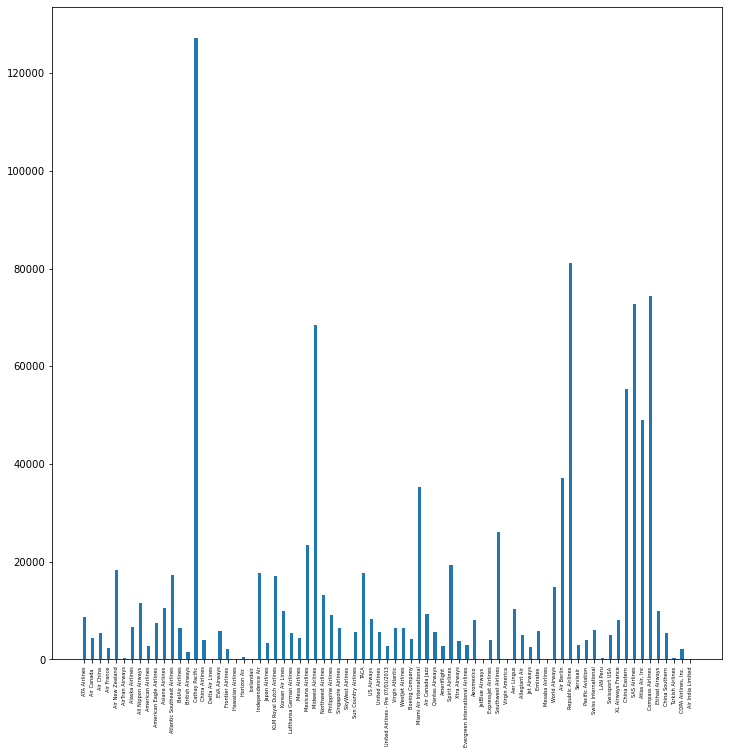

In [315]:
#Muestro un gráfico de barras con la media de pasajeros por compañia
plt.figure(figsize=(12,12))
plt.bar(compañias_totales,media_pasajeros, width=0.4)
plt.xticks(rotation=90, fontsize=5)
plt.show()

## Eliminacón de los registros duplicados del campo "GEO Region".
Elimino el registro de duplicados manteniendo el valor más alto de pasajeros de cada compañía.

In [316]:
dff = df.sort_values("Passenger Count", ascending=False).drop_duplicates(subset='GEO Region').compute()
dff


,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
11331,201308,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 3,F,659837,Deplaned,659837,2013,August
2973,200708,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Asia,Deplaned,Other,International,G,86398,Deplaned,86398,2007,August
14008,201507,United Airlines,UA,United Airlines,UA,International,Europe,Deplaned,Other,International,G,48136,Deplaned,48136,2015,July
2872,200708,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 3,E,39798,Deplaned,39798,2007,August
12590,201407,United Airlines,UA,United Airlines,UA,International,Mexico,Deplaned,Other,International,G,29206,Deplaned,29206,2014,July
13945,201507,Emirates,EK,Emirates,EK,International,Middle East,Deplaned,Other,International,A,14769,Deplaned,14769,2015,July
13191,201501,Air New Zealand,NZ,Air New Zealand,NZ,International,Australia / Oceania,Enplaned,Other,International,G,12973,Enplaned,12973,2015,January
12903,201410,TACA,TA,TACA,TA,International,Central America,Deplaned,Other,International,A,8970,Deplaned,8970,2014,October
7737,201101,LAN Peru,LP,LAN Peru,LP,International,South America,Deplaned,Other,International,A,3685,Deplaned,3685,2011,January


## Nuevos archivos csv.
Tanto en la relación de pasajeros con las aerolineas, que he guardado previamente en un diccionario, y la eliminación de duplicados de "GEO Region", los hemos creado como Dataframes y ahora los convertiremos en archivos csv.

In [317]:
# guardo los dataframe en archivos csv
df2.to_csv('aerolineas_totales.csv', index=False)
dff.to_csv('aerolineas_region.csv', index=False)


## Analisis estadístico
Calculo la media, la desviación típica y una matriz de correlación para el resto de columnas con tipo de dato "int".

In [318]:
#calculo las medias de las columnas
a_p = df["Activity Period"].mean().compute()
a_p_c = df["Adjusted Passenger Count"].mean().compute()
y = df["Year"].mean().compute()
print("LA MEDIA DE LA COLUMNA Activity Period ES: ", a_p)
print("LA MEDIA DE LA COLUMNA Adjusted Passenger Count ES: ", a_p_c)
print("LA MEDIA DE LA COLUMNA Year ES: ", y)

LA MEDIA DE LA COLUMNA Activity Period ES:  201045.07336576266
LA MEDIA DE LA COLUMNA Adjusted Passenger Count ES:  29331.917105350836
LA MEDIA DE LA COLUMNA Year ES:  2010.385220230559


In [319]:
#calculo las desviaciones tipicas de las columnas
a_p = df["Activity Period"].std().compute()
a_p_c = df["Adjusted Passenger Count"].std().compute()
y = df["Year"].std().compute()
print("LA DESVIACIÓN TÍPICA DE LA COLUMNA Activity Period ES: ", a_p)
print("LA DESVIACIÓN TÍPICA DE LA COLUMNA Adjusted Passenger Count ES: ", a_p_c)
print("LA DESVIACIÓN TÍPICA DE LA COLUMNA Year ES: ", y)

LA DESVIACIÓN TÍPICA DE LA COLUMNA Activity Period ES:  313.33619609971413
LA DESVIACIÓN TÍPICA DE LA COLUMNA Adjusted Passenger Count ES:  58284.18221866232
LA DESVIACIÓN TÍPICA DE LA COLUMNA Year ES:  3.1375890431679667


<AxesSubplot:>

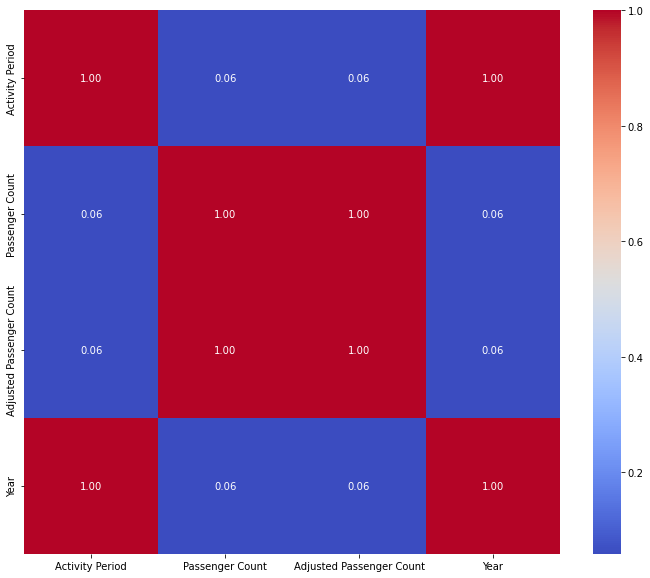

In [320]:
#matriz de correlación
corr = df.corr().compute()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap = 'coolwarm', xticklabels=corr.columns.values, yticklabels=corr.columns.values) 

In [321]:
#elimino los valores nulos de dataframe
df= df.dropna()
df.compute()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [322]:
#Quito las columnas que no me interesan
df= df.drop(columns=['Activity Period',"Operating Airline", "Published Airline", "Published Airline IATA Code", "Price Category Code",  "Adjusted Activity Type Code", "Adjusted Passenger Count"])
df.compute()


,Operating Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Terminal,Boarding Area,Passenger Count,Year,Month
0,TZ,Domestic,US,Deplaned,Terminal 1,B,27271,2005,July
1,TZ,Domestic,US,Enplaned,Terminal 1,B,29131,2005,July
2,TZ,Domestic,US,Thru / Transit,Terminal 1,B,5415,2005,July
3,AC,International,Canada,Deplaned,Terminal 1,B,35156,2005,July
4,AC,International,Canada,Enplaned,Terminal 1,B,34090,2005,July
...,...,...,...,...,...,...,...,...,...
15002,VX,Domestic,US,Enplaned,Terminal 2,D,194636,2016,March
15003,VX,International,Mexico,Deplaned,International,A,4189,2016,March
15004,VX,International,Mexico,Enplaned,Terminal 2,D,4693,2016,March
15005,VS,International,Europe,Deplaned,International,A,12313,2016,March


In [323]:
df= dd.get_dummies(df, columns= ["Operating Airline IATA Code", "GEO Summary", "GEO Region", "Activity Type Code", "Terminal", "Boarding Area", "Month"])
df.compute()

NotImplementedError: `get_dummies` with non-categorical dtypes is not supported. Please use `df.categorize()` beforehand to convert to categorical dtype.